In [2]:
import pandas as pd
from scipy import stats, sparse
import bottleneck
#%matplotlib notebook
%matplotlib inline
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from scipy.sparse import csr_matrix

from scipy import sparse
#import pickle
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.sparse import csr_matrix

In [3]:
import subprocess
#cluster_data = np.loadtxt("bc-30.out")
from numpy import genfromtxt
a = subprocess.call("awk '/4HRC_A/{ printf NR; exit }' bc-30.out > clusid", cwd= "/data/lohia/EGAD_analysis/egad_cath", shell=True)
#print (clusid)

In [4]:
def build_netowk_seq_identity(go, id_val=0, s35='TRUE'):

    data = pd.read_csv('cath-b-newest-all.txt', sep=" ", header=None)
    #data = pd.read_csv('cath-b-s35-newest', sep=" ", header=None)
    data.columns = ["pdb_chain_domain", "version", "cath", "residues"]
    print(data)
    del data['version']
    del data['residues']
    #print data
    data['pdb']=data['pdb_chain_domain'].str[:4] # removing extra characters in protein name
    data['pdb'] = data['pdb'].apply(lambda x: x.upper())
    data['pdb_chain'] = data['pdb'] + '_' + data['pdb_chain_domain'].str[4:5]
    data.drop_duplicates(subset=['pdb'], keep='first', inplace=True)

    #del data['pdb_chain_domain']   

    #del data['pdb']

    data = data.set_index('pdb_chain')
    print(go.index)
    print(data.index)
    genes_intersect = go.index.intersection(data.index)
    print(genes_intersect)
    print(data)
    

    #print genes_intersect
    data = data.loc[genes_intersect, :]
    print(genes_intersect)
    
    del data['pdb']
    #df['D'] = df['U'].map(d)
    subprocess.call("rm -rf clusid", cwd= "/data/lohia/EGAD_analysis/egad_cath", shell=True)
    for pdb_id in data.index.values :
        subprocess.call("awk '/%s/{ printf NR ; exit }' %s.out >> clusid ; echo 1 >> clusid" %(pdb_id, id_val), cwd= "/data/lohia/EGAD_analysis/egad_cath", shell=True)
    data['clus_id_35'] = np.loadtxt('clusid', delimiter='/t')
    #data.drop_duplicates(subset=['pdb'], keep='first', inplace=True)
    print (data)
    #print(data.shape)
    #data.drop_duplicates(subset='etc.', keep='first', inplace=True)
    #print data 

    new=data['cath'].str.split(".", n = 3, expand = True)  # expand the cath domains
    #print(data.to_string())

    #data['cath']=new[id_val]
    data['cath'] = data['clus_id_35']
    #data['etc.']=new[3] #just takes same homology family into account
    data['cath'] = data['cath'].astype(float)
    
    protein_list=genes_intersect.to_list()
    num_protein = len(protein_list)
    #print len(protein_list)
    pre_values=data.iloc[:,1].values
    print(pre_values)
    pre_values = pre_values.astype('int8')
    #print pre_values.shape
    #p_values = np.reshape(pre_values,(num_protein,1))
    #data_matrix =  np.tile(pre_values,(num_protein,1))
    data_matrix = np.zeros((num_protein,num_protein), dtype='int8')
    #print(data_matrix.dtype)   


    row_idx =0
    for cluster in pre_values:
           #col_idx = row_idx +1
           #data_matrix[row_idx][0 :col_idx]   = 5
           #data_matrix[row_idx][0 :col_idx] = pre_values[0 :col_idx] / cluster
           data_matrix[row_idx] = np.where(pre_values == cluster, 1,0)
           #data_matrix= np.maximum( data_matrix, data_matrix.transpose() )
           row_idx = row_idx +1
    #data_matrix = data_matrix.astype('float64')
    output_matrix = data_matrix
    np.save('output_matrix_%s.npy' %id_val, output_matrix)
    np.save('protein_list_%s.npy' %id_val, protein_list)
    #print output_matrix
    return output_matrix, protein_list

In [5]:
def build_netowk(go, id_val=0, s35='TRUE', clus_i='bc-30'):

    data = pd.read_csv('cath-b-newest-all.txt', sep=" ", header=None)
    #data = pd.read_csv('cath-b-s35-newest', sep=" ", header=None)
    data.columns = ["pdb_chain_domain", "version", "cath", "residues"]
    print(data)
    del data['version']
    del data['residues']
    #print data
    data['pdb']=data['pdb_chain_domain'].str[:4] # removing extra characters in protein name
    data['pdb'] = data['pdb'].apply(lambda x: x.upper())
    data['pdb_chain'] = data['pdb'] + '_' + data['pdb_chain_domain'].str[4:5]
    data.drop_duplicates(subset=['pdb'], keep='first', inplace=True)

    #del data['pdb_chain_domain']   

    #del data['pdb']

    data = data.set_index('pdb_chain')
    print(go.index)
    print(data.index)
    genes_intersect = go.index.intersection(data.index)
    print(genes_intersect)
    print(data)
    

    #print genes_intersect
    data = data.loc[genes_intersect, :]
    print(genes_intersect)
    
    del data['pdb']
    #df['D'] = df['U'].map(d)
    subprocess.call("rm -rf clusid", cwd= "/data/lohia/EGAD_analysis/egad_cath", shell=True)
    for pdb_id in data.index.values :
        subprocess.call("awk '/%s/{ printf NR ; exit }' %s.out >> clusid ; echo 1 >> clusid" %(pdb_id, clus_i), cwd= "/data/lohia/EGAD_analysis/egad_cath", shell=True)
    data['clus_id_35'] = np.loadtxt('clusid', delimiter='/t')
    data.drop_duplicates(subset=['clus_id_35'], keep='first', inplace=True)
    print (data)
    #print(data.shape)
    #data.drop_duplicates(subset='etc.', keep='first', inplace=True)
    #print data 

    new=data['cath'].str.split(".", n = 3, expand = True)  # expand the cath domains
    #print(data.to_string())

    data['cath']=new[id_val]
    #data['cath'] = data['clus_id_35']
    #data['etc.']=new[3] #just takes same homology family into account
    data['cath'] = data['cath'].astype(float)
    
    protein_list=data.index.to_list()
    num_protein = len(protein_list)
    #print len(protein_list)
    pre_values=data.iloc[:,1].values
    print(pre_values)
    pre_values = pre_values.astype('int8')
    #print pre_values.shape
    #p_values = np.reshape(pre_values,(num_protein,1))
    #data_matrix =  np.tile(pre_values,(num_protein,1))
    data_matrix = np.zeros((num_protein,num_protein), dtype='int8')
    #print(data_matrix.dtype)   


    row_idx =0
    for cluster in pre_values:
           #col_idx = row_idx +1
           #data_matrix[row_idx][0 :col_idx]   = 5
           #data_matrix[row_idx][0 :col_idx] = pre_values[0 :col_idx] / cluster
           data_matrix[row_idx] = np.where(pre_values == cluster, 1,0)
           #data_matrix= np.maximum( data_matrix, data_matrix.transpose() )
           row_idx = row_idx +1
    #data_matrix = data_matrix.astype('float64')
    output_matrix = data_matrix
    np.save('output_matrix_%s.npy' %id_val, output_matrix)
    np.save('protein_list_%s.npy' %id_val, protein_list)
    #print output_matrix
    return output_matrix, protein_list

In [13]:
def run_egad(go, nw, **kwargs):
    """EGAD running function
    
    Wrapper to lower level functions for EGAD

    EGAD measures modularity of gene lists in co-expression networks. 

    This was translated from the MATLAB version, which does tiled Cross Validation
    
    The useful kwargs are:
    int - nFold : Number of CV folds to do, default is 3, 
    int - {min,max}_count : limits for number of terms in each gene list, these are exclusive values


    Arguments:
        go {pd.DataFrame} -- dataframe of genes x terms of values [0,1], where 1 is included in gene lists
        nw {pd.DataFrame} -- dataframe of co-expression network, genes x genes
        **kwargs 
    
    Returns:
        pd.DataFrame -- dataframe of terms x metrics where the metrics are 
        ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    """
    assert nw.shape[0] == nw.shape[1] , 'Network is not square'
    #print(nw.index)
    #nw.columns = nw.columns.astype(int)
    #print(nw.columns.astype(int))
    assert np.all(nw.index == nw.columns) , 'Network index and columns are not in the same order'

    #nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    #nw = nw.loc[nw_mask, nw_mask].astype('float')
    #np.fill_diagonal(nw.values, 1)
    return _runNV(go, nw, **kwargs)

def _runNV(go, nw, nFold=3, min_count=20, max_count=500):

    #Make sure genes are same in go and nw
    #go.index = go.index.map(str) 
    #nw.index = nw.index.map(str)
    #nw.index = nw.index.str.replace('_', '')
    #go.index = go.index.str.replace('_', '')
    print (nw)
    genes_intersect = go.index.intersection(nw.index)

    #print genes_intersect
    go = go.loc[genes_intersect, :]
    nw = nw.loc[genes_intersect, genes_intersect]
    print (go)
    print (nw.shape)
    print (go.shape)
    sparsity = 1.0 - np.count_nonzero(go) / go.size
    print (sparsity)
    sparsity = 1.0 - np.count_nonzero(nw) / nw.size
    print (sparsity)
    #print(nw
    #print(go
    nw_mask = nw.isna().sum(axis=1) != nw.shape[1]
    nw = nw.loc[nw_mask, nw_mask].astype('float')
    np.fill_diagonal(nw.values, 1)
    #Make sure there aren't duplicates
    duplicates = nw.index.duplicated(keep='first')
    nw = nw.loc[~duplicates, ~duplicates]
    print (go['GO:0005125'].loc[go['GO:0005125'] == True])


    go = go.loc[:, (go.sum(axis=0) > min_count) & (go.sum(axis=0) < max_count)]
    go = go.loc[~go.index.duplicated(keep='first'), :]
    #print(go)

    roc = _new_egad(go.values, nw.values, nFold)

    col_names = ['AUC', 'AVG_NODE_DEGREE', 'DEGREE_NULL_AUC', 'P_Value']
    #Put output in dataframe
    return pd.DataFrame(dict(zip(col_names, roc)), index=go.columns)

def _new_egad(go, nw, nFold):

    #Build Cross validated Positive
    x, y = np.where(go)
    #print(x, y)
    cvgo = {}
    for i in np.arange(nFold):
        a = x[i::nFold]
        #print(a)
        b = y[i::nFold]
        dat = np.ones_like(a)
        mask = sparse.coo_matrix((dat, (a, b)), shape=go.shape)
        cvgo[i] = go - mask.toarray()

    CVgo = np.concatenate(list(cvgo.values()), axis=1)
    #print(CVgo)

    sumin = np.matmul(nw.T, CVgo)

    degree = np.sum(nw, axis=0)
    #print(degree)
    #print(degree[:, None])

    predicts = sumin / degree[:, None]
    #print(predicts)

    np.place(predicts, CVgo > 0, np.nan)

    #print(predicts)

    #Calculate ranks of positives
    rank_abs = lambda x: stats.rankdata(np.abs(x))
    predicts2 = np.apply_along_axis(rank_abs, 0, predicts)
    #print(predicts2)

    #Masking Nans that were ranked (how tiedrank works in matlab)
    predicts2[np.isnan(predicts)] = np.nan
    #print(predicts2)

    filtering = np.tile(go, nFold)
    #print(filtering)

    #negatives :filtering == 0
    #Sets Ranks of negatives to 0
    np.place(predicts2, filtering == 0, 0)

    #Sum of ranks for each prediction
    p = bottleneck.nansum(predicts2, axis=0)
    n_p = np.sum(filtering, axis=0) - np.sum(CVgo, axis=0)

    #Number of negatives
    #Number of GO terms - number of postiive
    n_n = filtering.shape[0] - np.sum(filtering, axis=0)

    roc = (p / n_p - (n_p + 1) / 2) / n_n
    U = roc * n_p * n_n
    Z = (np.abs(U - (n_p * n_n / 2))) / np.sqrt(n_p * n_n *
                                                (n_p + n_n + 1) / 12)
    roc = roc.reshape(nFold, go.shape[1])
    Z = Z.reshape(nFold, go.shape[1])
    #Stouffer Z method
    Z = bottleneck.nansum(Z, axis=0) / np.sqrt(nFold)
    #Calc ROC of Neighbor Voting
    roc = bottleneck.nanmean(roc, axis=0)
    P = stats.norm.sf(Z)

    #Average degree for nodes in each go term
    avg_degree = degree.dot(go) / np.sum(go, axis=0)

    #Calc null auc for degree
    ranks = np.tile(stats.rankdata(degree), (go.shape[1], 1)).T

    np.place(ranks, go == 0, 0)

    n_p = bottleneck.nansum(go, axis=0)
    nn = go.shape[0] - n_p
    p = bottleneck.nansum(ranks, axis=0)

    roc_null = (p / n_p - ((n_p + 1) / 2)) / nn
    #print(roc)
    return roc, avg_degree, roc_null, P


#reads the go_prop file
#pickle_in = open('gotermindex.pickle','rb')

[[1.   0.5  0.25 ... 0.25 0.25 0.5 ]
 [0.5  1.   0.5  ... 0.25 0.   0.25]
 [0.25 0.5  1.   ... 0.5  0.   0.  ]
 ...
 [0.25 0.25 0.5  ... 1.   0.   0.  ]
 [0.25 0.   0.   ... 0.   1.   0.  ]
 [0.5  0.25 0.   ... 0.   0.   1.  ]]
        10GS_A  12CA_A  133L_A  1A00_A  1A0L_A  1A12_A  1A15_A  1A1X_A  \
10GS_A    1.00    0.50    0.25    0.25    0.50    0.00    0.25    0.50   
12CA_A    0.50    1.00    0.50    0.50    0.25    0.00    0.00    0.25   
133L_A    0.25    0.50    1.00    0.75    0.25    0.00    0.00    0.25   
1A00_A    0.25    0.50    0.75    1.00    0.25    0.00    0.00    0.25   
1A0L_A    0.50    0.25    0.25    0.25    1.00    0.50    0.50    0.75   
...        ...     ...     ...     ...     ...     ...     ...     ...   
6TZT_A    0.25    0.25    0.50    0.50    0.25    0.00    0.00    0.25   
6U26_A    0.25    0.25    0.00    0.00    0.00    0.00    0.00    0.00   
6URO_E    0.25    0.25    0.50    0.50    0.25    0.00    0.00    0.25   
6V4X_A    0.25    0.00    0.00  

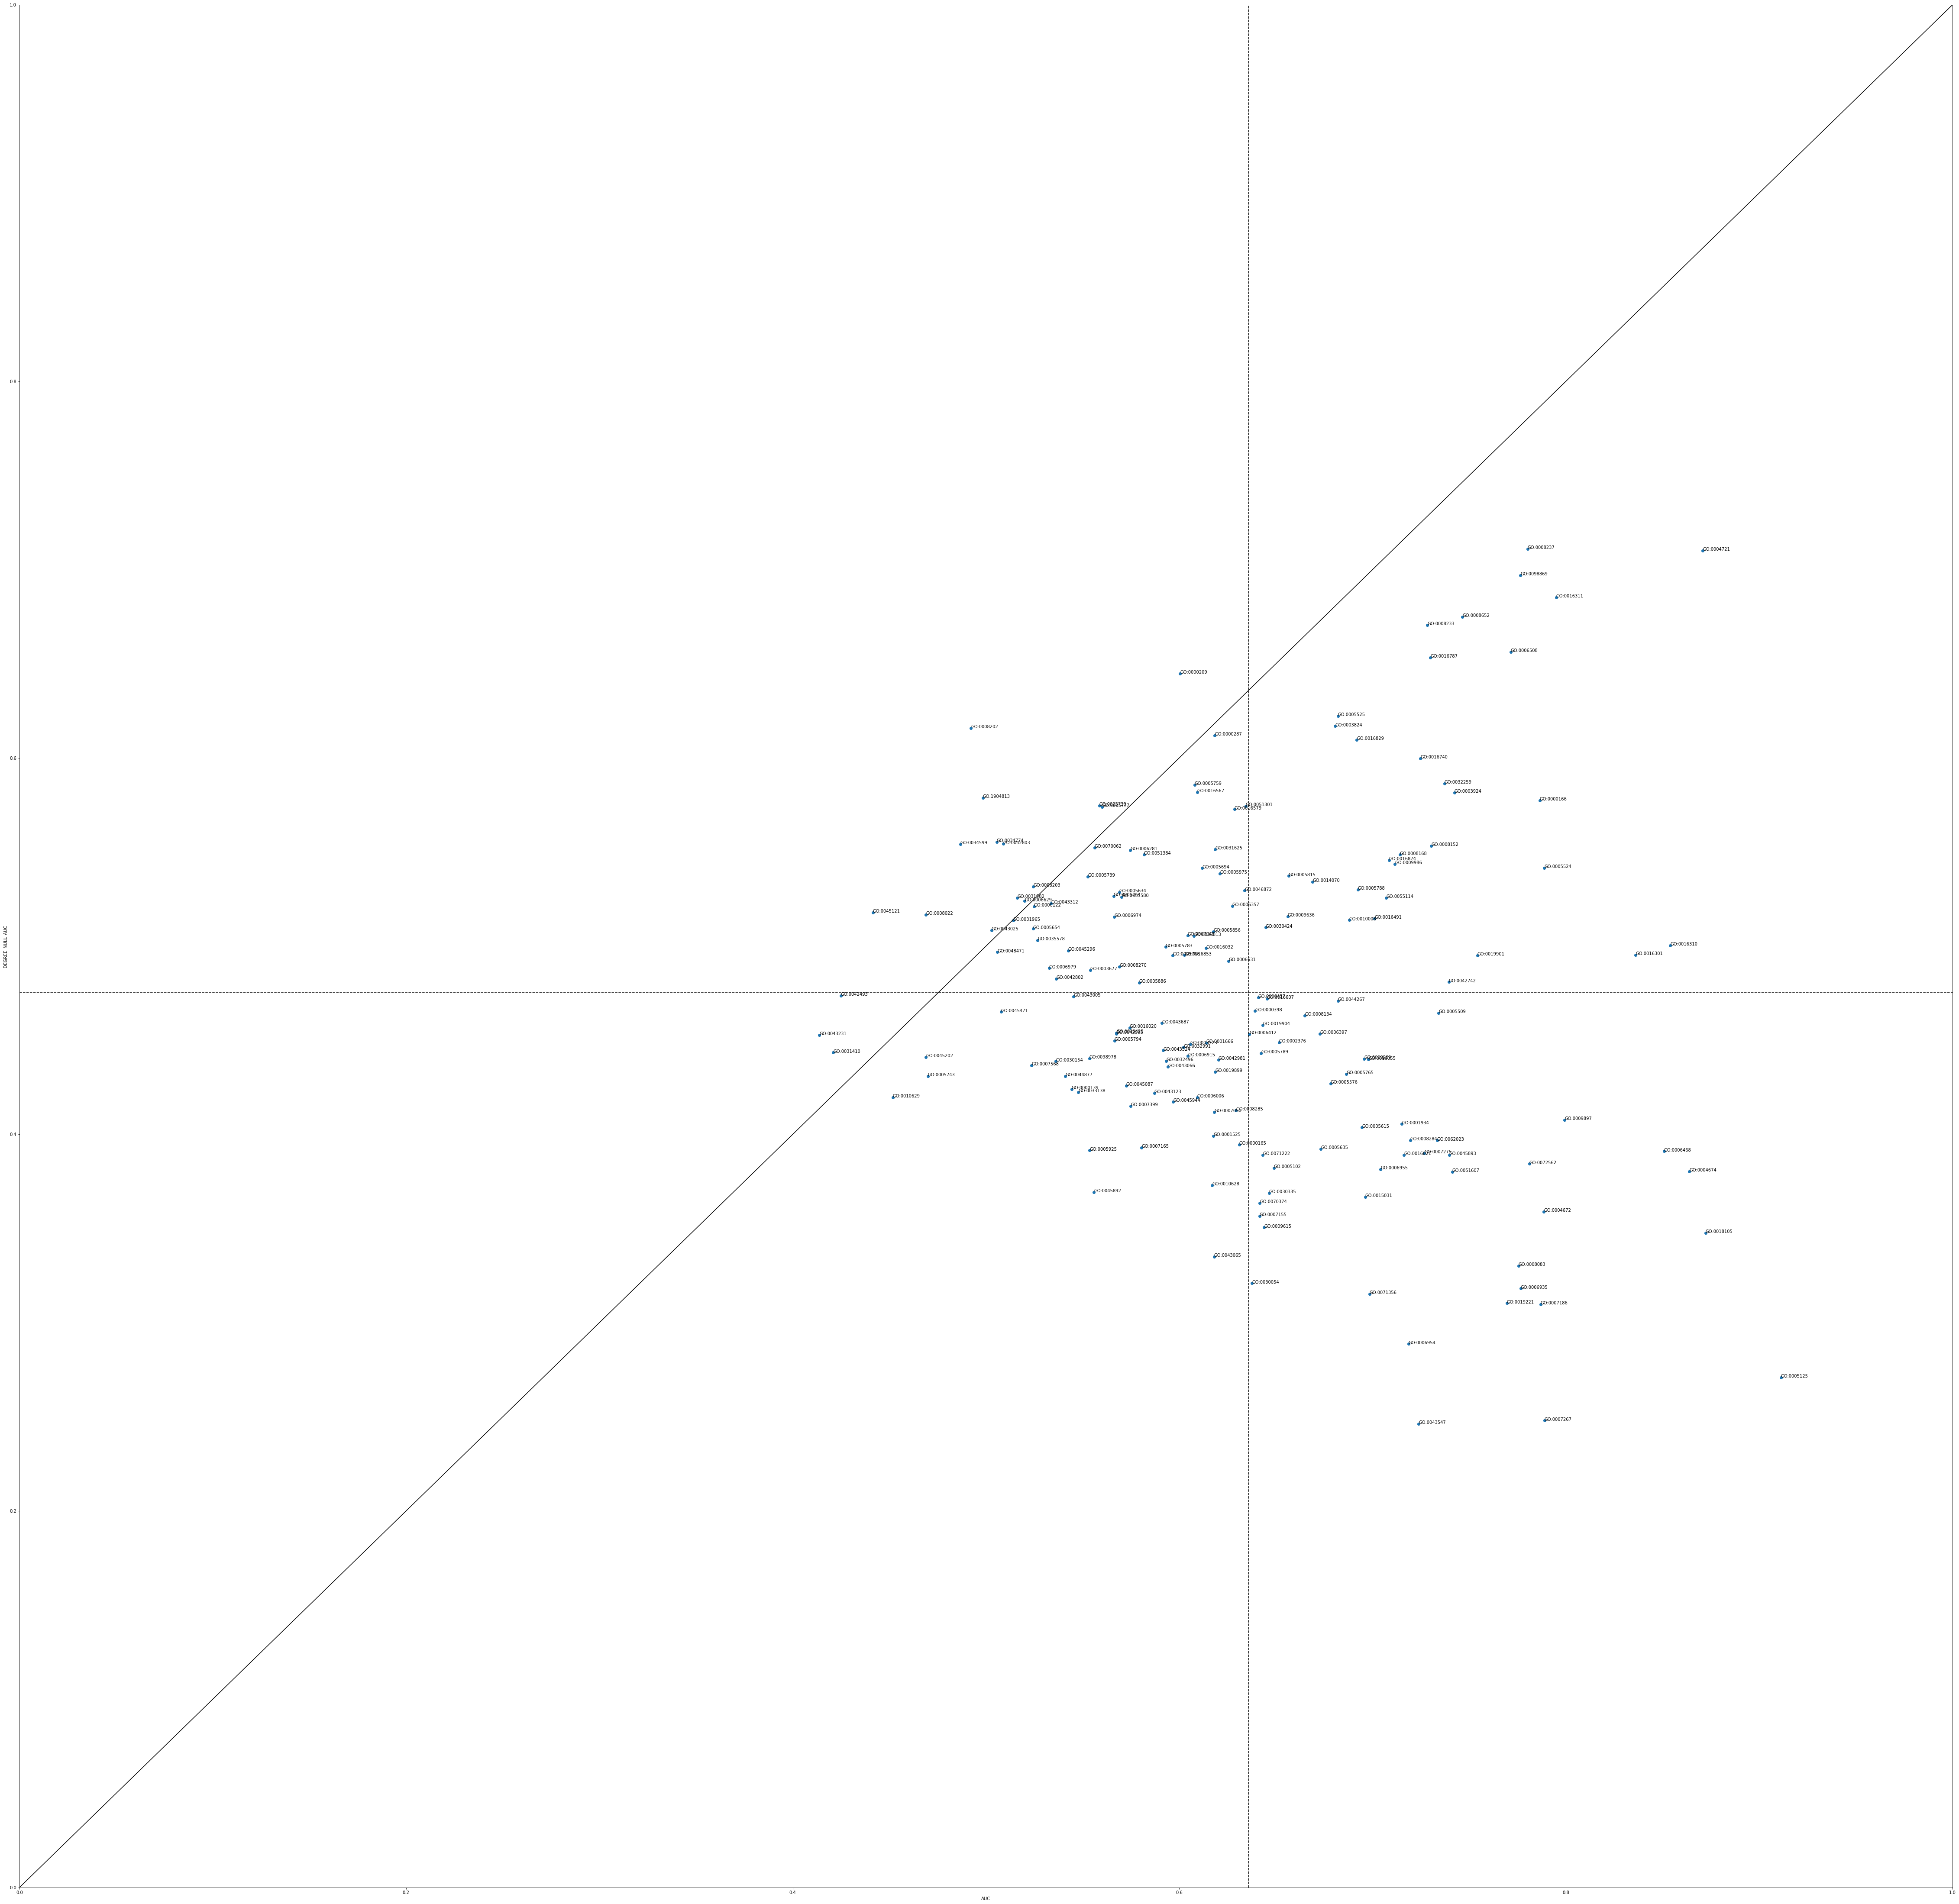

In [15]:
#gotermidx_dict = pickle.load(pickle_in)
#go_id = gotermidx_dict.keys()
go_id = np.load('go_id.npy')
go_matrix = np.load('go_pdb.npy')

#pickle_in = open('pdb_index','rb')

#gotermidx_dict = pickle.load(pickle_in)

pdb_id = np.load('pdb_index.npy')

go = pd.DataFrame(data=go_matrix,index=pdb_id,columns=go_id)


#for id_val in range(1,3):
##do the processing for network
#    output_matrix, protein_list = build_netowk(go, id_val)
#    output_matrix = np.load('output_matrix_%s_35.npy' %id_val)
#    protein_list = np.load('protein_list_%s_35.npy' %id_val)

#for id_val in ['bc-30', 'bc-100']:
##do the processing for network
#    output_matrix, protein_list = build_netowk(go, id_val)
id_val = 0
#output_matrix, protein_list = build_netowk(go, id_val)
protein_list = np.load('protein_list_%s.npy' %id_val)
#output_matrix = np.load('output_matrix_%s.npy' %id_val)
id_val = "all_3"
output_matrix = np.load('output_matrix_0.npy') + np.load('output_matrix_1.npy') + np.load('output_matrix_2.npy') + np.load('output_matrix_3.npy')
#output_matrix = np.load('output_matrix_0_35.npy') + np.load('output_matrix_1_35.npy') + np.load('output_matrix_2_35.npy') + np.load('output_matrix_3_35.npy')
#output_matrix = np.load('output_matrix_0.npy')
output_matrix = output_matrix.astype('float')
output_matrix = output_matrix * (1./output_matrix.max())

print(output_matrix)

nw = pd.DataFrame(data=output_matrix,index=protein_list,columns=protein_list)
#nw = pd.read_hdf('nw_3.hdf5', 'nw')
#print nw.index.str.strip('_')
#run egad
#output_matrix = np.load('output_matrix_2.npy')
#nw_0 = pd.DataFrame(data=output_matrix,index=protein_list,columns=protein_list)

#go = pd.read_hdf('/data/bharris/GO_data/go_mouse_nw.hdf5', 'go')
#nw =pd.read_hdf('/data/bharris/biccn_coexpression/data/bulk_rna/aggregate_bulk_nw.hdf5', 'nw')
df = run_egad(go, nw)
#df_0 = run_egad(go, nw_0)
print(df.shape)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80, 80), sharey=True)
#ax = df.plot.scatter(x='AUC',y='DEGREE_NULL_AUC')
ax.scatter(x=df['AUC'].values,y=df['DEGREE_NULL_AUC'].values)
ax = df.plot('AUC', 'DEGREE_NULL_AUC', kind='scatter', ax=ax)
df['go_an'] = df.index
df[['AUC','DEGREE_NULL_AUC','go_an']].apply(lambda row: ax.text(*row),axis=1)
#print df.mean()
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='black')
plt.axvline(x=df['AUC'].mean(),c='black',ls='--')
plt.axhline(y=df['DEGREE_NULL_AUC'].mean(), c='black', ls='--')
print(df['AUC'].mean())
#print(df_0['AUC'].mean())
print (df['AUC'].idxmax())
#plt.show()
plt.savefig('%s.pdf' %id_val, bbox_inches='tight', dpi=100)

In [ ]:
=